## Лабораторная 2
### Датасет 1. Комиксы на сайте Webtoon

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

df = pd.read_csv(".//csv//Webtoon_Dataset.csv")
print(df.columns)

Index(['id', 'Name', 'Writer', 'Likes', 'Genre', 'Rating', 'Subscribers',
       'Summary', 'Update', 'Reading Link'],
      dtype='object')


1) **Бизнес-цель:** Проанализировать предпочтений читателей для создания комикса
2) **Эффект:** успешность комикса
3) **Техническая цель:** определить предпочитаемые жанры аудитории сайта Webtoon
4) **Входные данные:** 'Subscribers', 'Rating', 'Genre'
5) **Целевой признак:** 'Genre'

6) **Обнаруженные проблемы:**<br/>
Зашумленность данных. В колонке "число подписчиков" данные имеют строковое представление, есть значения с буквенными обозначениями K и k. Переделаем их в цифровое представление.<br/>
Выбросы: есть комиксы с очень большим количеством подписчиков.


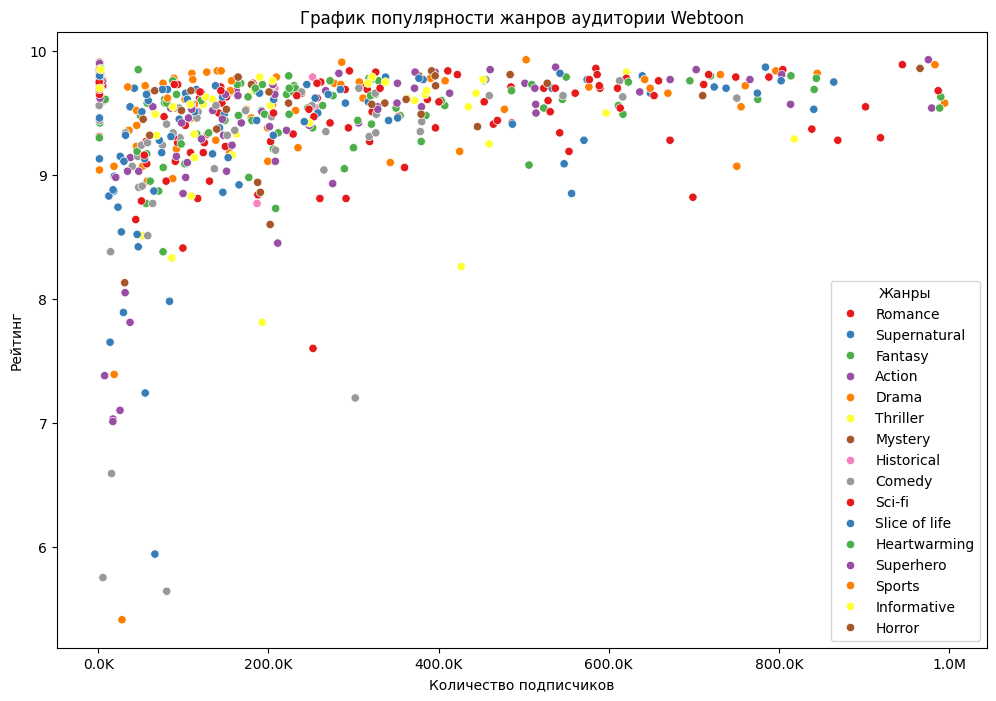

In [287]:
# убираем зашумленность
def convert_str_to_float(value):
    if isinstance(value, str):
        if 'm' in value:
            return float(value.replace(',', '').replace('m', '')) * 1000000
        elif 'M' in value:
            return float(value.replace(',', '').replace('M', '')) * 1000
        elif 'k' in value:
            return float(value.replace(',', '').replace('k', '')) * 1000
        elif 'K' in value:
            return float(value.replace(',', '').replace('K', '')) * 1000
        elif 'b' in value:
            return float(value.replace(',', '').replace('b', '')) * 1000000000
        elif 'B' in value:
            return float(value.replace(',', '').replace('B', '')) * 1000000000
    return value

# чтобы шкала была более наглядная
def thousands(x, pos):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    else:
        return f'{x / 1_000:.1f}K'

df['Subscribers'] = df['Subscribers'].apply(convert_str_to_float)

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='Subscribers', y='Rating', hue='Genre', data=df, palette='Set1')
# форматтер для x
ax.xaxis.set_major_formatter(FuncFormatter(thousands))
plt.title('График популярности жанров аудитории Webtoon')
plt.xlabel('Количество подписчиков')
plt.ylabel('Рейтинг')
plt.legend(title='Жанры')
plt.show()


Выводы по графику:
- Есть смещение в сторону меньших значений, это можно исправить при помощи oversampling и undersampling;

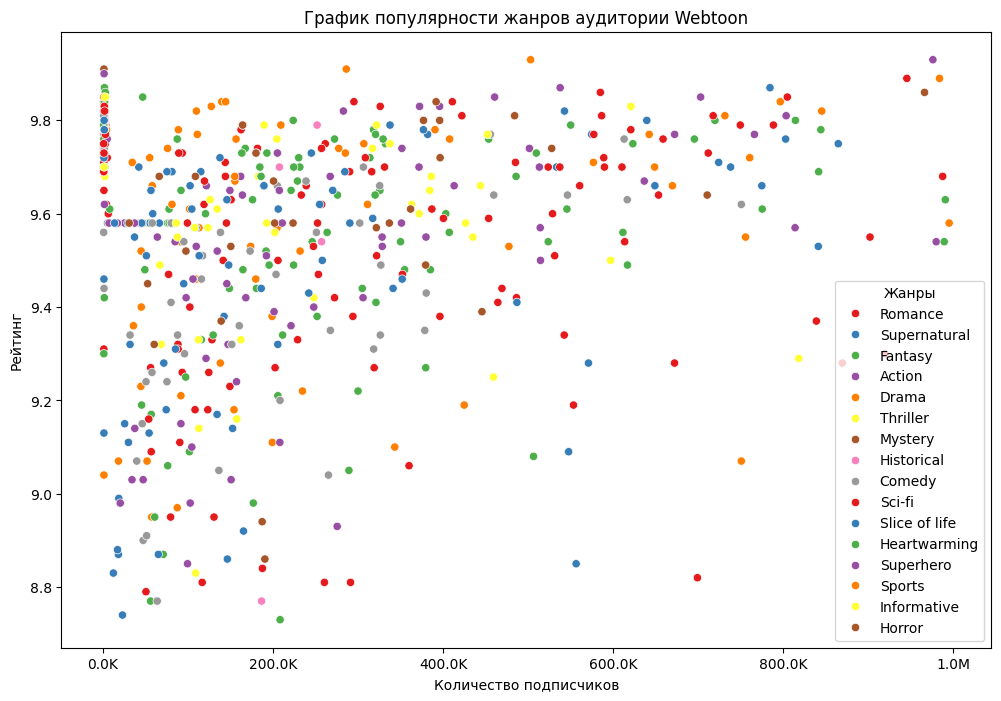

In [288]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5 * IQR
outliers = (df['Rating'] < (Q1 - threshold)) | (df['Rating'] > (Q3 + threshold))

median_rating = df['Rating'].median()
df.loc[outliers, 'Rating'] = median_rating

plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='Subscribers', y='Rating', hue='Genre', data=df, palette='Set1')
# форматтер для x
ax.xaxis.set_major_formatter(FuncFormatter(thousands))
plt.title('График популярности жанров аудитории Webtoon')
plt.xlabel('Количество подписчиков')
plt.ylabel('Рейтинг')
plt.legend(title='Жанры')
plt.show()

7) **Разбиение** на обучающую, контрольную и тестовую выборки.

In [289]:
from sklearn.model_selection import train_test_split

# обучающая и тестовая
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# обучающая на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 341
Размер контрольной выборки: 114
Размер тестовой выборки: 114


8) **Оценка сбалансированности выборок.**<br/>

Распределение Genre в обучающей выборке:
Genre
Fantasy          59
Romance          51
Action           37
Drama            33
Slice of life    30
Comedy           29
Sci-fi           24
Thriller         19
Supernatural     18
Superhero        15
Horror            8
Sports            7
Historical        4
Mystery           3
Informative       3
Heartwarming      1
Name: count, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


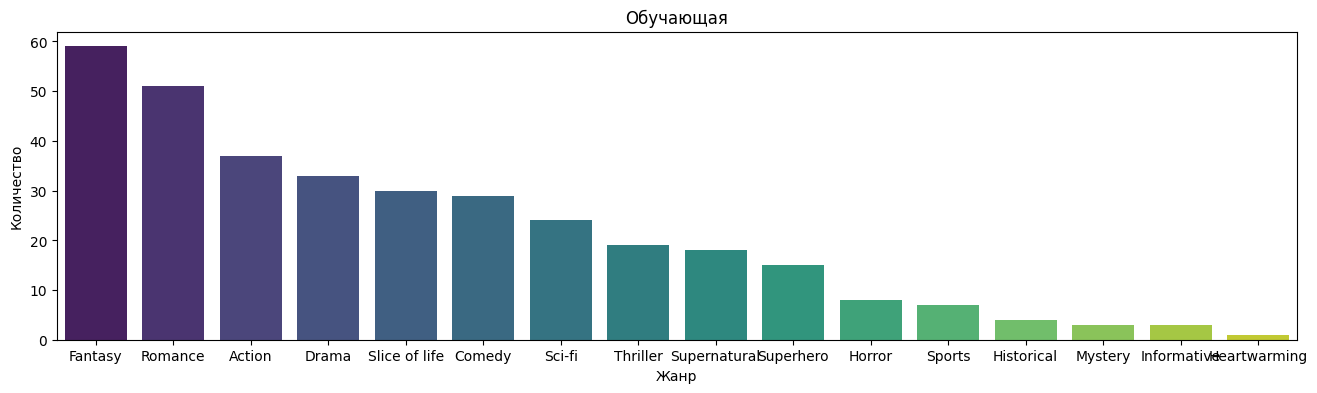

In [290]:
def build_graph(df, column_name, title, xlabel):
    genre_counts = df[f'{column_name}'].value_counts()
    plt.figure(figsize=(16, 4))
    sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    plt.ylabel('Количество')
    plt.show()

def check_balance(df, name):
    counts = df['Genre'].value_counts()
    print(f"Распределение Genre в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
build_graph(train_df, 'Genre', 'Обучающая', 'Жанр')

Распределение Genre в контрольной выборке:
Genre
Romance          20
Fantasy          19
Slice of life    13
Comedy           11
Drama            11
Superhero         8
Thriller          7
Action            6
Horror            6
Supernatural      6
Sci-fi            4
Mystery           2
Sports            1
Name: count, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


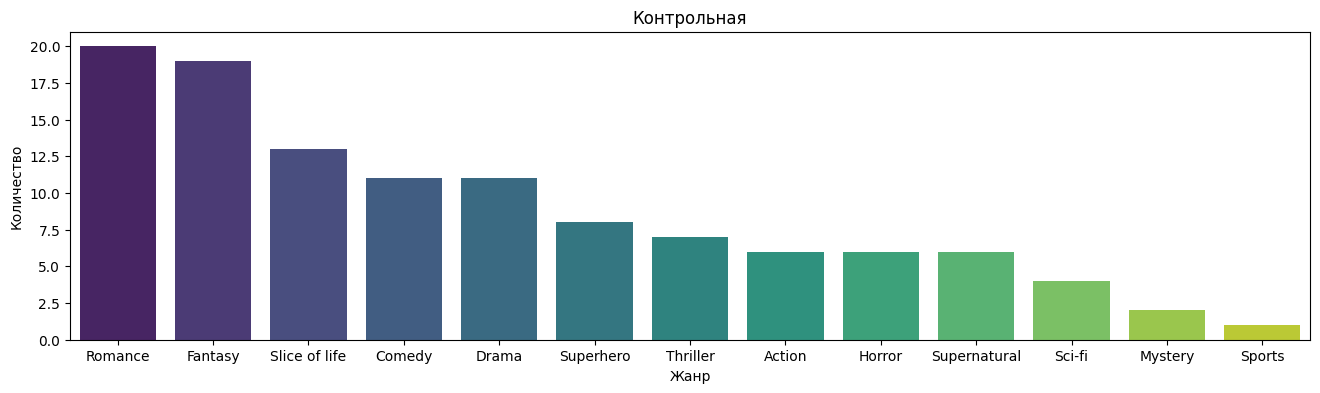

In [291]:
check_balance(val_df, "контрольной выборке")
build_graph(val_df, 'Genre', 'Контрольная', 'Жанр')

Распределение Genre в тестовой выборке:
Genre
Romance          19
Fantasy          17
Drama            16
Comedy           12
Supernatural      9
Thriller          9
Horror            6
Slice of life     6
Sci-fi            4
Action            4
Mystery           4
Superhero         3
Informative       2
Sports            2
Heartwarming      1
Name: count, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


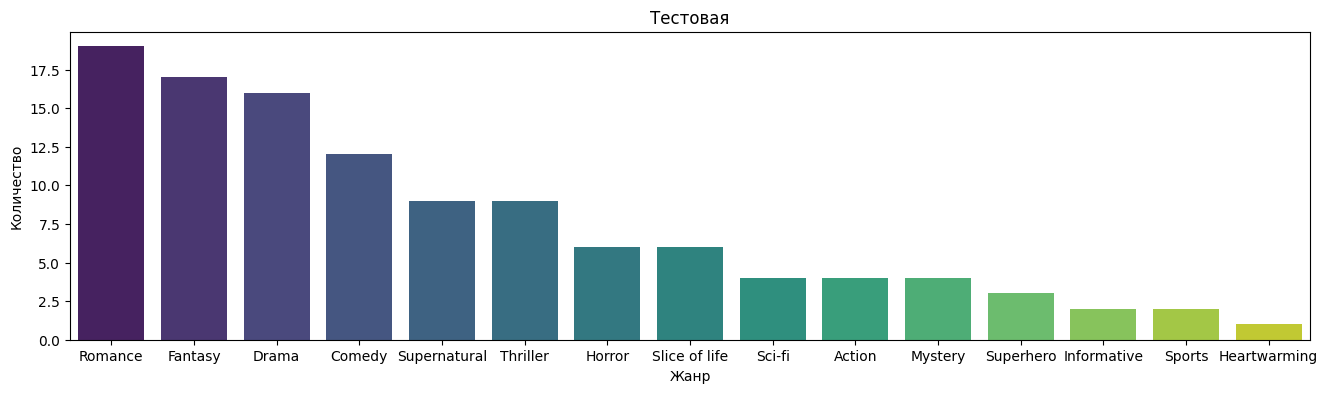

In [292]:
check_balance(test_df, "тестовой выборке")
build_graph(test_df, 'Genre', 'Тестовая', 'Жанр')

Выборки относительно сбалансированы

9) Приращение данных с помощью oversampling и undersampling

In [293]:
from imblearn.over_sampling import RandomOverSampler

def oversample(df):
    X = df.drop('Genre', axis=1)
    y = df['Genre']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

# Проверка
check_balance(train_df_oversampled, "обучающей выборке после oversampling")

Распределение Genre в обучающей выборке после oversampling:
Genre
Action           59
Fantasy          59
Romance          59
Thriller         59
Sci-fi           59
Sports           59
Slice of life    59
Superhero        59
Mystery          59
Comedy           59
Horror           59
Drama            59
Supernatural     59
Historical       59
Informative      59
Heartwarming     59
Name: count, dtype: int64



In [294]:
check_balance(val_df_oversampled, "контрольной выборке после oversampling")

Распределение Genre в контрольной выборке после oversampling:
Genre
Drama            20
Comedy           20
Fantasy          20
Mystery          20
Romance          20
Horror           20
Superhero        20
Sports           20
Sci-fi           20
Action           20
Thriller         20
Supernatural     20
Slice of life    20
Name: count, dtype: int64



In [295]:
check_balance(test_df_oversampled, "тестовой выборке после oversampling")


Распределение Genre в тестовой выборке после oversampling:
Genre
Fantasy          19
Drama            19
Supernatural     19
Sci-fi           19
Horror           19
Informative      19
Comedy           19
Romance          19
Thriller         19
Slice of life    19
Superhero        19
Sports           19
Mystery          19
Action           19
Heartwarming     19
Name: count, dtype: int64



In [296]:
from imblearn.under_sampling import RandomUnderSampler

def undersample(df):
    X = df.drop('Genre', axis=1)
    y = df['Genre']
    
    undersampler = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_undersampled = undersample(train_df)
val_df_undersampled = undersample(val_df)
test_df_undersampled = undersample(test_df)

check_balance(train_df_undersampled, "обучающей выборке после undersampling")

Распределение Genre в обучающей выборке после undersampling:
Genre
Action           1
Comedy           1
Drama            1
Fantasy          1
Heartwarming     1
Historical       1
Horror           1
Informative      1
Mystery          1
Romance          1
Sci-fi           1
Slice of life    1
Sports           1
Superhero        1
Supernatural     1
Thriller         1
Name: count, dtype: int64



In [297]:
check_balance(val_df_undersampled, "контрольной выборке после undersampling")

Распределение Genre в контрольной выборке после undersampling:
Genre
Action           1
Comedy           1
Drama            1
Fantasy          1
Horror           1
Mystery          1
Romance          1
Sci-fi           1
Slice of life    1
Sports           1
Superhero        1
Supernatural     1
Thriller         1
Name: count, dtype: int64



In [298]:
check_balance(test_df_undersampled, "тестовой выборке после undersampling")

Распределение Genre в тестовой выборке после undersampling:
Genre
Action           1
Comedy           1
Drama            1
Fantasy          1
Heartwarming     1
Horror           1
Informative      1
Mystery          1
Romance          1
Sci-fi           1
Slice of life    1
Sports           1
Superhero        1
Supernatural     1
Thriller         1
Name: count, dtype: int64



### Датасет 2. Использование мобильных телефонов

In [299]:
df = pd.read_csv(".//csv//mobile_usage_behavioral_analysis.csv")
print(df.columns)

Index(['User_ID', 'Age', 'Gender', 'Total_App_Usage_Hours',
       'Daily_Screen_Time_Hours', 'Number_of_Apps_Used',
       'Social_Media_Usage_Hours', 'Productivity_App_Usage_Hours',
       'Gaming_App_Usage_Hours', 'Location'],
      dtype='object')


1) **Бизнес-цель:** для исследовательского журнала определить статистику, сколько человек тратит времени на социальные сети.
2) **Эффект:** увеличение интереса читателей к журналу.
3) **Техническая цель:** разработка модели прогнозирования использования соцсетей в зависимости от возраста
4) **Входные данные:** Social_Media_Usage_Hours
5) **Целевой признак:** Social_Media_Usage_Hours

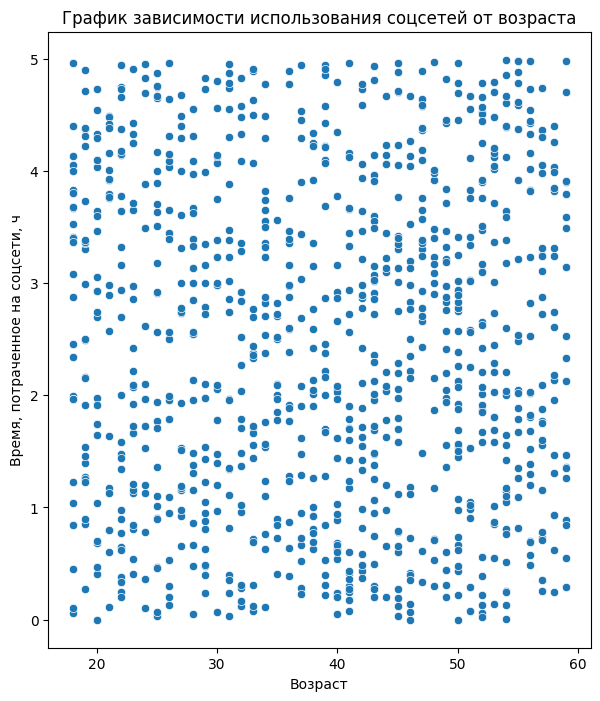

In [300]:
# преобразование из строки в число и очистка от пустых значений
df['Social_Media_Usage_Hours'] = df['Social_Media_Usage_Hours'].astype(float)
plt.figure(figsize=(7, 8))

plt.subplot
sns.scatterplot(x='Age', y='Social_Media_Usage_Hours', data=df)
plt.title('График зависимости использования соцсетей от возраста')
plt.xlabel('Возраст')
plt.ylabel('Время, потраченное на соцсети, ч')
plt.show()

Набор достаточно сбалансирован, выбросов нет, нулевых значений тоже.

7) Разбиение на обучающую, контрольную и тестовую выборки.

In [301]:
from sklearn.model_selection import train_test_split

# обучающая и тестовая
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# обучающая на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 600
Размер контрольной выборки: 200
Размер тестовой выборки: 200


8) **Оценка сбалансированности выборок.**<br/>

Распределение Social_Media_Usage_Hours в обучающей выборке:
Social_Media_Usage_Hours
1.98    5
1.97    5
0.20    5
2.42    4
4.29    4
       ..
0.39    1
1.91    1
0.80    1
0.53    1
3.50    1
Name: count, Length: 342, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


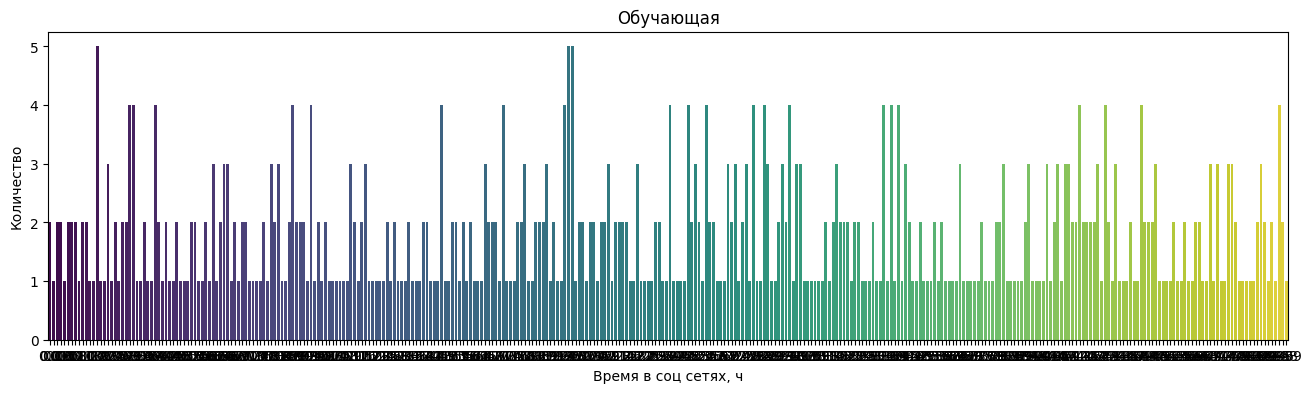

In [302]:
def check_balance(df, name):
    counts = df['Social_Media_Usage_Hours'].value_counts()
    print(f"Распределение Social_Media_Usage_Hours в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
build_graph(train_df, 'Social_Media_Usage_Hours', 'Обучающая', 'Время в соц сетях, ч')

Распределение Social_Media_Usage_Hours в контрольной выборке:
Social_Media_Usage_Hours
3.36    3
2.71    3
1.13    3
2.92    3
3.64    3
       ..
2.07    1
2.03    1
3.98    1
1.80    1
1.34    1
Name: count, Length: 156, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


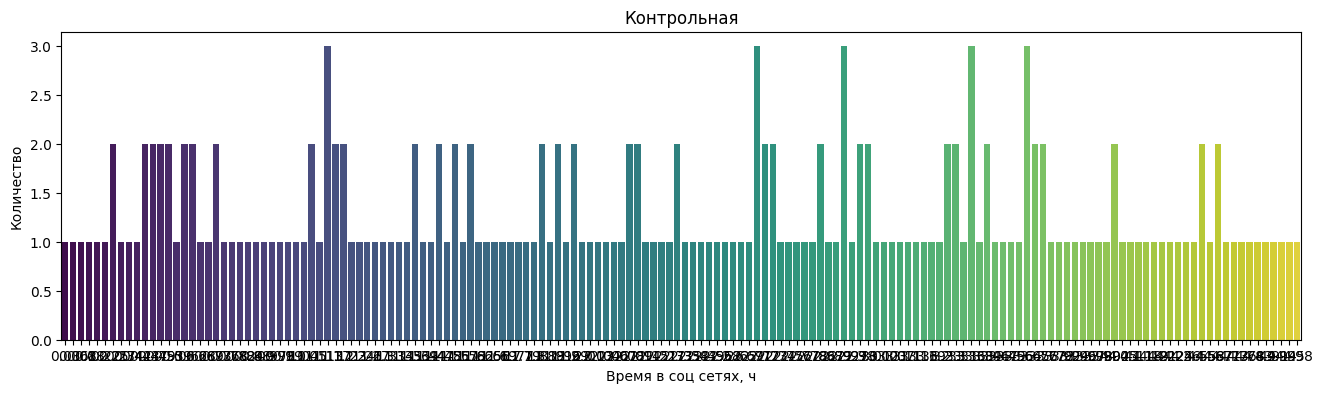

In [303]:
check_balance(val_df, "контрольной выборке")
build_graph(val_df, 'Social_Media_Usage_Hours', 'Контрольная', 'Время в соц сетях, ч')

Распределение Social_Media_Usage_Hours в тестовой выборке:
Social_Media_Usage_Hours
4.40    3
2.83    3
2.00    2
4.16    2
1.48    2
       ..
0.86    1
3.74    1
0.41    1
0.21    1
0.67    1
Name: count, Length: 169, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


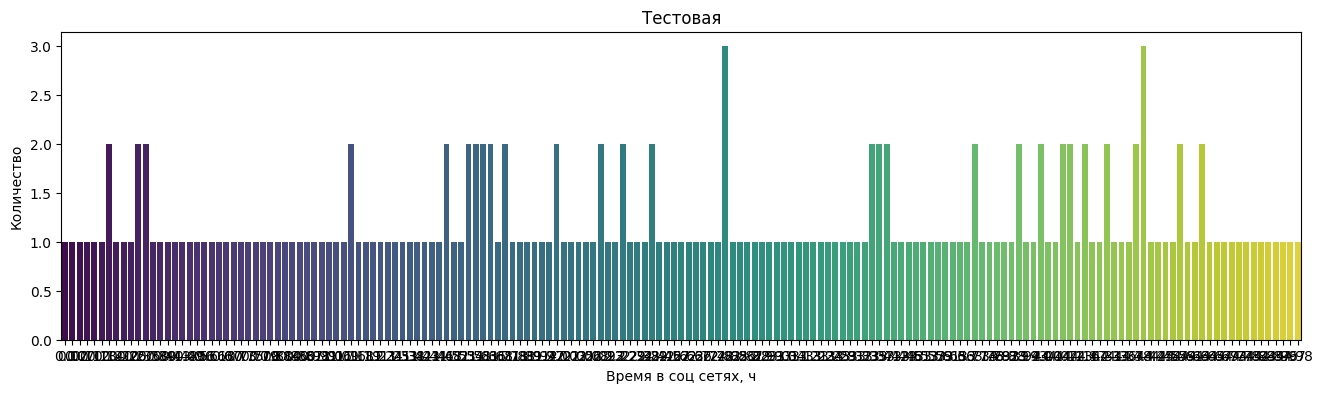

In [304]:
check_balance(test_df, "тестовой выборке")
build_graph(test_df, 'Social_Media_Usage_Hours', 'Тестовая', 'Время в соц сетях, ч')

9) Приращение данных с помощью oversampling и undersampling

In [305]:
from imblearn.over_sampling import RandomOverSampler

def oversample(df):
    X = df.drop('Social_Media_Usage_Hours', axis=1)
    # метки y должны быть дискретными, а не неприрыными -> конвертируем в целое число
    y = df['Social_Media_Usage_Hours'].astype(int)
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")

Распределение Social_Media_Usage_Hours в обучающей выборке после oversampling:
Social_Media_Usage_Hours
2    135
0    135
1    135
3    135
4    135
Name: count, dtype: int64



In [306]:
check_balance(val_df_oversampled, "контрольной выборке после oversampling")

Распределение Social_Media_Usage_Hours в контрольной выборке после oversampling:
Social_Media_Usage_Hours
1    48
3    48
0    48
4    48
2    48
Name: count, dtype: int64



In [307]:
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение Social_Media_Usage_Hours в тестовой выборке после oversampling:
Social_Media_Usage_Hours
3    46
4    46
2    46
1    46
0    46
Name: count, dtype: int64



### Датасет 3. Факторы, влияющие на успеваемость студентов

https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

In [308]:
df = pd.read_csv(".//csv//StudentPerformanceFactors.csv")
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


1) **Бизнес-цель:** повышение успеваемости студентов за счет улучшения факторов, влияющих на успеваемость студентов.
2) **Эффект:** улучшение показателей успеваемости и увеличение конкурентоспособности образовательного учреждения.
3) **Техническая цель:** разработка модели машинного обучения, которая сможет предсказывать успеваемость студента (например, оценки на экзаменах)
4) **Входные данные:** 'Hours_Studied', 'Attendance', 'Extracurricular_Activities', 'Sleep_Hours'
5) **Целевой признак:** 'Exam_Score'

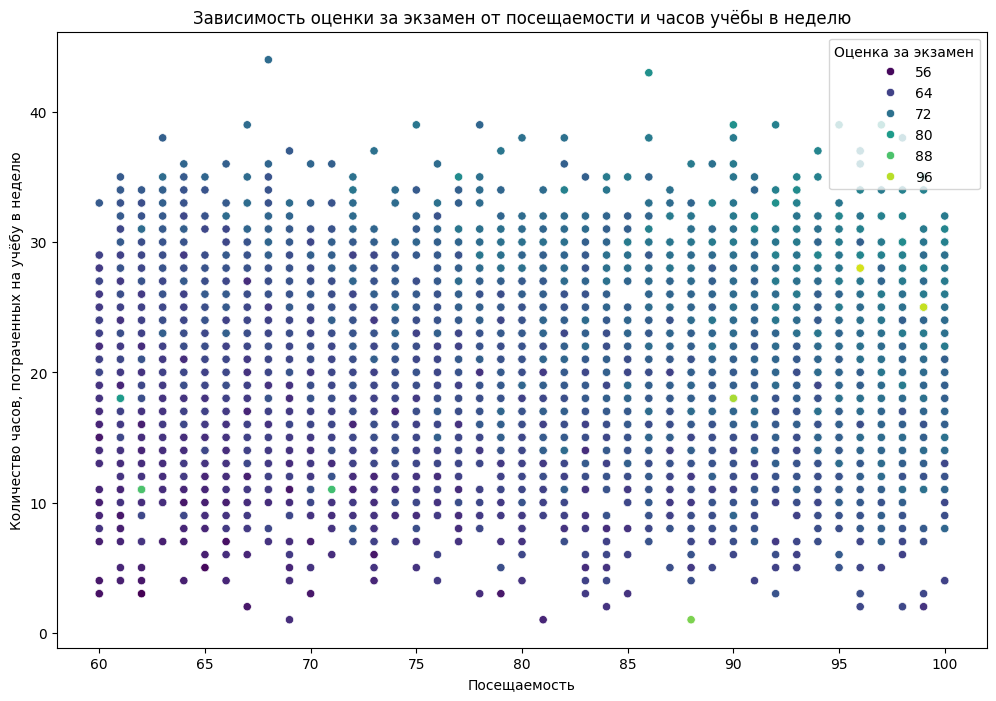

In [309]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Attendance', y='Hours_Studied', hue='Exam_Score', data=df, palette='viridis')
# форматтер для x
plt.title('Зависимость оценки за экзамен от посещаемости и часов учёбы в неделю')
plt.xlabel('Посещаемость')
plt.ylabel('Количество часов, потраченных на учёбу в неделю')
plt.legend(title='Оценка за экзамен')
plt.show()

6. Обнаруженные проблемы:
- Точки расположены относительно равномерно, значит, зашумленности нет.
- Точки распределены относительно равномерно по осям X и Y, смещениея нет
- На графике есть выбросы, но они не критичны

7) Разбиение на обучающую, контрольную и тестовую выборки.


In [310]:
from sklearn.model_selection import train_test_split

# обучающая и тестовая
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# обучающая на обучающую и контрольную
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 3963
Размер контрольной выборки: 1322
Размер тестовой выборки: 1322


8) **Оценка сбалансированности выборок.**<br/>

Распределение Exam_Score в обучающей выборке:
Exam_Score
68     467
66     441
67     420
65     404
69     368
70     322
64     301
71     255
63     226
72     180
62     164
61     108
73      84
74      60
60      50
59      24
75      22
58      17
76      11
80       4
77       4
78       3
94       2
79       2
86       2
98       2
84       2
92       2
99       2
82       2
89       2
87       1
95       1
57       1
83       1
85       1
97       1
96       1
101      1
88       1
93       1
Name: count, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


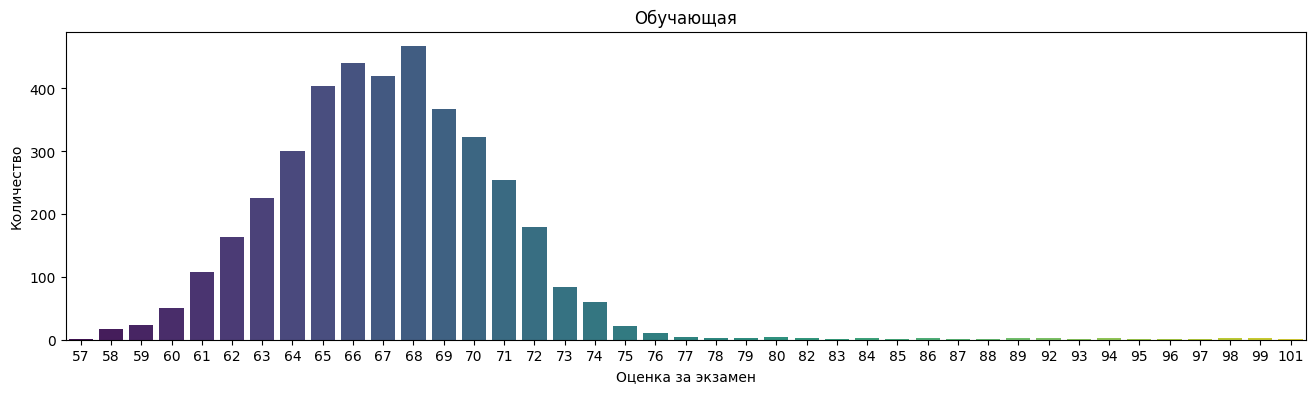

In [311]:
def check_balance(df, name):
    counts = df['Exam_Score'].value_counts()
    print(f"Распределение Exam_Score в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
build_graph(train_df, 'Exam_Score', 'Обучающая', 'Оценка за экзамен')

Распределение Exam_Score в контрольной выборке:
Exam_Score
66     166
67     155
68     145
69     138
65     127
64     106
70     104
71      69
63      68
72      54
62      46
61      37
74      27
73      24
60      14
59      11
75       9
76       4
58       2
82       2
94       2
86       2
88       1
56       1
79       1
84       1
97       1
95       1
57       1
91       1
78       1
100      1
Name: count, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


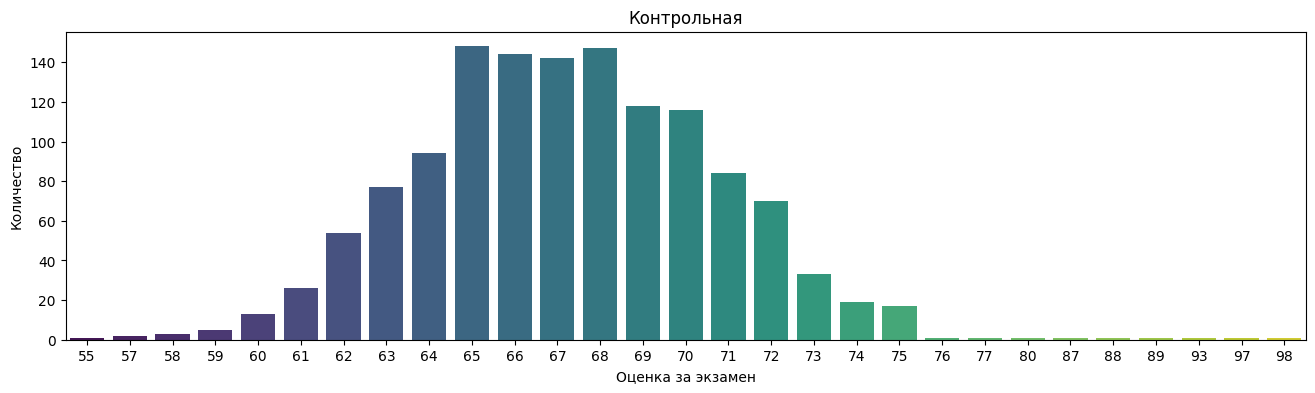

In [312]:
check_balance(val_df, "контрольной выборке")
build_graph(test_df, 'Exam_Score', 'Контрольная', 'Оценка за экзамен')

Распределение Exam_Score в тестовой выборке:
Exam_Score
65    148
68    147
66    144
67    142
69    118
70    116
64     94
71     84
63     77
72     70
62     54
73     33
61     26
74     19
75     17
60     13
59      5
58      3
57      2
55      1
89      1
88      1
98      1
97      1
77      1
80      1
76      1
87      1
93      1
Name: count, dtype: int64



C:\Temp\ipykernel_7960\3933200995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')


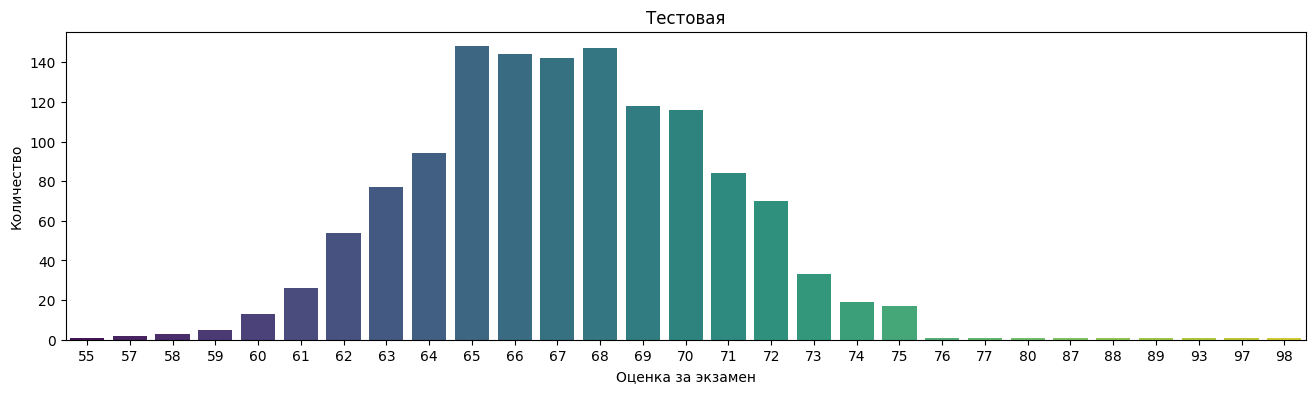

In [313]:
check_balance(test_df, "тестовой выборке")
build_graph(test_df, 'Exam_Score', 'Тестовая', 'Оценка за экзамен')

9) Приращение данных с помощью oversampling и undersampling

In [314]:
from imblearn.over_sampling import RandomOverSampler

def oversample(df):
    X = df.drop('Exam_Score', axis=1)
    y = df['Exam_Score']
    
    oversampler = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = oversampler.fit_resample(X, y)
    
    resampled_df = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df)
val_df_oversampled = oversample(val_df)
test_df_oversampled = oversample(test_df)

check_balance(train_df_oversampled, "обучающей выборке после oversampling")


Распределение Exam_Score в обучающей выборке после oversampling:
Exam_Score
67     467
73     467
65     467
63     467
64     467
68     467
69     467
66     467
72     467
71     467
76     467
70     467
61     467
94     467
62     467
60     467
74     467
59     467
78     467
80     467
86     467
77     467
75     467
79     467
87     467
58     467
83     467
85     467
95     467
99     467
92     467
84     467
57     467
96     467
97     467
98     467
82     467
101    467
89     467
88     467
93     467
Name: count, dtype: int64



In [315]:
check_balance(val_df_oversampled, "контрольной выборке после oversampling")

Распределение Exam_Score в контрольной выборке после oversampling:
Exam_Score
65     166
69     166
70     166
64     166
61     166
75     166
62     166
66     166
72     166
67     166
68     166
63     166
71     166
59     166
74     166
73     166
76     166
82     166
56     166
88     166
60     166
84     166
58     166
79     166
95     166
97     166
86     166
57     166
91     166
78     166
94     166
100    166
Name: count, dtype: int64



In [316]:
check_balance(test_df_oversampled, "тестовой выборке после oversampling")

Распределение Exam_Score в тестовой выборке после oversampling:
Exam_Score
65    148
71    148
64    148
66    148
72    148
70    148
63    148
74    148
69    148
67    148
62    148
89    148
55    148
73    148
61    148
60    148
68    148
75    148
59    148
58    148
88    148
57    148
98    148
97    148
77    148
80    148
76    148
87    148
93    148
Name: count, dtype: int64

